<a href="https://colab.research.google.com/github/TamaDioo/2341720098_ML_2025/blob/main/TG1_2_3_JS14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 14 - Convolutional Neural Network

Nama: Dio Andika Pradana Mulia Tama

NIM: 2341720098

Kelas: TI-3F

# Lab 1

Klasifikasi Cats vs. Dogs

## Deskripsi
Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

## Dataset
Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing.

## Langkah 1 - Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

### Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8011 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN
### Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan ***loss function binary crossentropy*** dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

## Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 1427s 5s/step - accuracy: 0.5842 - loss: 0.6676 - val_accuracy: 0.6790 - val_loss: 0.5876
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 102s 406ms/step - accuracy: 0.6820 - loss: 0.5970 - val_accuracy: 0.7365 - val_loss: 0.5333
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 101s 403ms/step - accuracy: 0.7272 - loss: 0.5383 - val_accuracy: 0.7190 - val_loss: 0.5573
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 143s 408ms/step - accuracy: 0.7489 - loss: 0.5139 - val_accuracy: 0.7470 - val_loss: 0.5208
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 106s 422ms/step - accuracy: 0.7561 - loss: 0.4961 - val_accuracy: 0.7725 - val_loss: 0.4797
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 97s 386ms/step - accuracy: 0.7763 - loss: 0.4643 - val_accuracy: 0.7845 - val_loss: 0.4605
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 99s 396ms/step - accuracy: 0.8011 - loss: 0.4328 - val_accuracy: 0.7785 - val_loss: 0.4682
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 99s 395ms/step - accuracy: 0.8082 - loss

## Langkah 5 - Prediksi dengan 1 Citra

Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [ ]:
print(prediction)

dog


# Lab 2
Klasifikasi Multilabel dengan dataset CIFAR

**Disclaimer**: Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman https://www.tensorflow.org/tutorials/images/cnn

## Deskripsi
Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

## Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Langkah 3 - Verifikasi Data

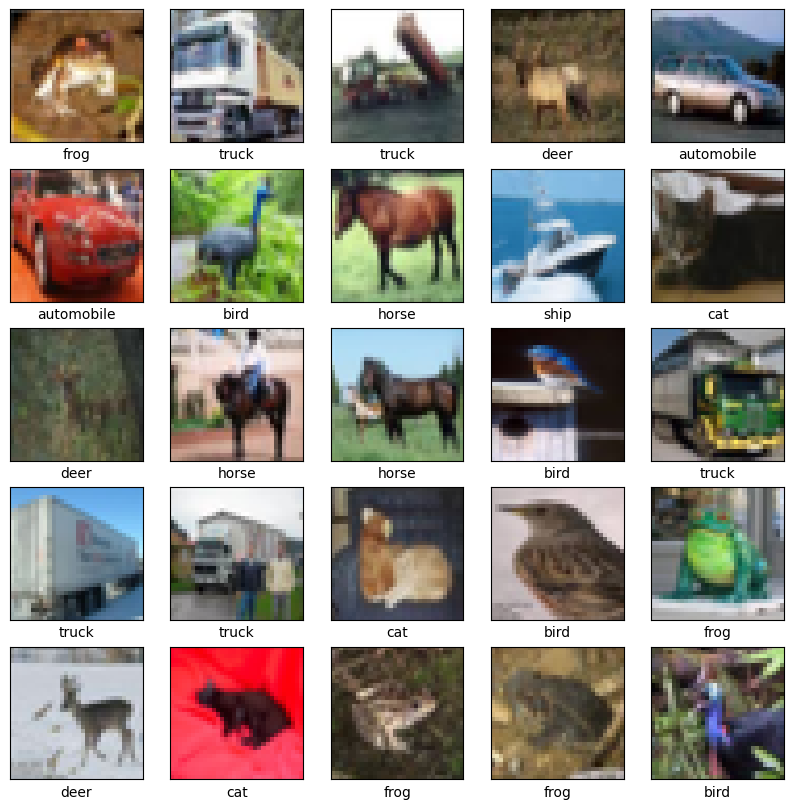

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Langkah 4 - Buat Model CNN
### Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.3476 - loss: 1.7581 - val_accuracy: 0.5285 - val_loss: 1.3057
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 54ms/step - accuracy: 0.5776 - loss: 1.1904 - val_accuracy: 0.5880 - val_loss: 1.1703
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.6450 - loss: 1.0150 - val_accuracy: 0.6494 - val_loss: 1.0152
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6862 - loss: 0.8981 - val_accuracy: 0.6806 - val_loss: 0.9127
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 56ms/step - accuracy: 0.7138 - loss: 0.8203 - val_accuracy: 0.6897 - val_loss: 0.8992
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.7377 - loss: 0.7530 - val_accuracy: 0.6656 - val_loss: 0.9658
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.7526 - loss: 0.7061 - val_accuracy: 0.7010 - val_loss: 0.8714
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.7701

## Langkah 6 - Evaluasi Model

313/313 - 5s - 15ms/step - accuracy: 0.7115 - loss: 0.8751


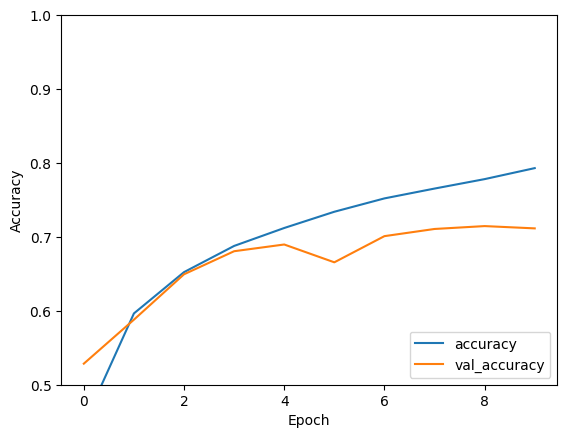

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.7114999890327454


Berapa akurasi yang Anda dapatkan?

0.7114999890327454



# Tugas Lab
- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

Untuk meningkatkan akurasi model, saya akan melakukan beberapa modifikasi:
1. Menambah lebih banyak layer konvolusi dengan filter yang lebih banyak
2. Menambahkan Batch Normalization untuk mempercepat training dan stabilitas
3. Menambahkan Dropout untuk mengurangi overfitting
4. Meningkatkan jumlah epoch
5. Menggunakan data augmentation pada data training

In [ ]:
# Load Library

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load dataset CIFAR-10
(train_images_t1, train_labels_t1), (test_images_t1, test_labels_t1) = datasets.cifar10.load_data()

# Normalisasi nilai pixel agar berada di antara 0 dan 1
train_images_t1, test_images_t1 = train_images_t1 / 255.0, test_images_t1 / 255.0

print(f'Training data shape: {train_images_t1.shape}')
print(f'Testing data shape: {test_images_t1.shape}')

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [ ]:
# Data augmentation untuk meningkatkan variasi data training
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(train_images_t1)

In [ ]:
# Membuat Model CNN yang Lebih Dalam dan Kompleks
model_improved = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(10)
])

model_improved.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
# Compile model dengan optimizer Adam
model_improved.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
# Training model dengan callback untuk early stopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callback untuk menghentikan training jika tidak ada improvement
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

# Callback untuk mengurangi learning rate jika stuck
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-7)

history_improved = model_improved.fit(
    datagen.flow(train_images_t1, train_labels_t1, batch_size=128),
    epochs=15,
    validation_data=(test_images_t1, test_labels_t1),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 555s 1s/step - accuracy: 0.2959 - loss: 2.2540 - val_accuracy: 0.2552 - val_loss: 2.4620 - learning_rate: 0.0010
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 543s 1s/step - accuracy: 0.4937 - loss: 1.4094 - val_accuracy: 0.5590 - val_loss: 1.2670 - learning_rate: 0.0010
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.5818 - loss: 1.1770 - val_accuracy: 0.5669 - val_loss: 1.3487 - learning_rate: 0.0010
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 542s 1s/step - accuracy: 0.6383 - loss: 1.0212 - val_accuracy: 0.6337 - val_loss: 1.1129 - learning_rate: 0.0010
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 542s 1s/step - accuracy: 0.6798 - loss: 0.9223 - val_accuracy: 0.7364 - val_loss: 0.7500 - learning_rate: 0.0010
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.6927 - loss: 0.8796 - val_accuracy: 0.6857 - val_loss: 0.9590 - learning_rate: 0.0010
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.7125 - loss: 0.

In [ ]:
# Evaluasi model pada test set
test_loss_improved, test_acc_improved = model_improved.evaluate(test_images_t1, test_labels_t1, verbose=2)

print(f'\nTest accuracy: {test_acc_improved:.4f} ({test_acc_improved*100:.2f}%)')
print(f'Test loss: {test_loss_improved:.4f}')

313/313 - 24s - 77ms/step - accuracy: 0.8238 - loss: 0.5358

Test accuracy: 0.8238 (82.38%)
Test loss: 0.5358


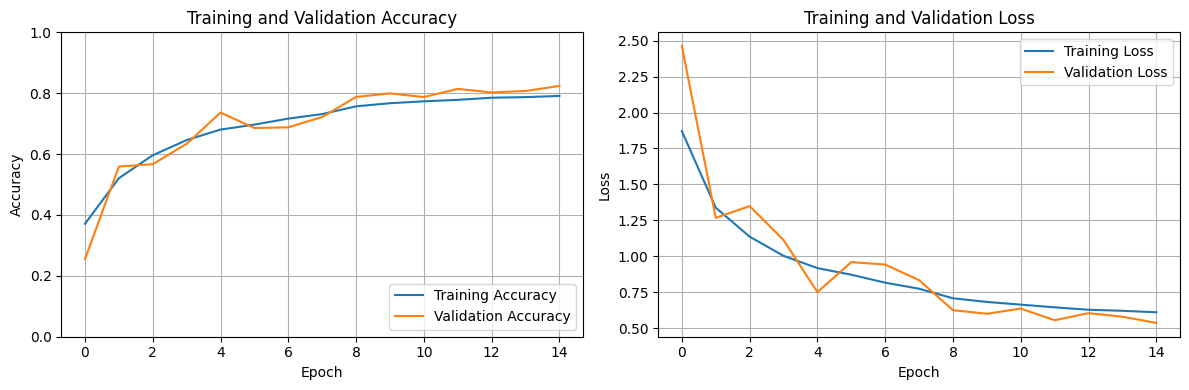

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

### Hasil akurasi testing adalah 82.38%.

- Buatlah model CNN untuk klasifikasi dataset MNIST.

In [ ]:
# Import Library MNIST
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load dataset MNIST
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = datasets.mnist.load_data()

# Reshape data untuk CNN (menambahkan channel dimension)
train_images_mnist = train_images_mnist.reshape((60000, 28, 28, 1))
test_images_mnist = test_images_mnist.reshape((10000, 28, 28, 1))

# Normalisasi nilai pixel agar berada di antara 0 dan 1
train_images_mnist, test_images_mnist = train_images_mnist / 255.0, test_images_mnist / 255.0

print(f'Training data shape: {train_images_mnist.shape}')
print(f'Testing data shape: {test_images_mnist.shape}')
print(f'Number of classes: {len(np.unique(train_labels_mnist))}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)
Number of classes: 10


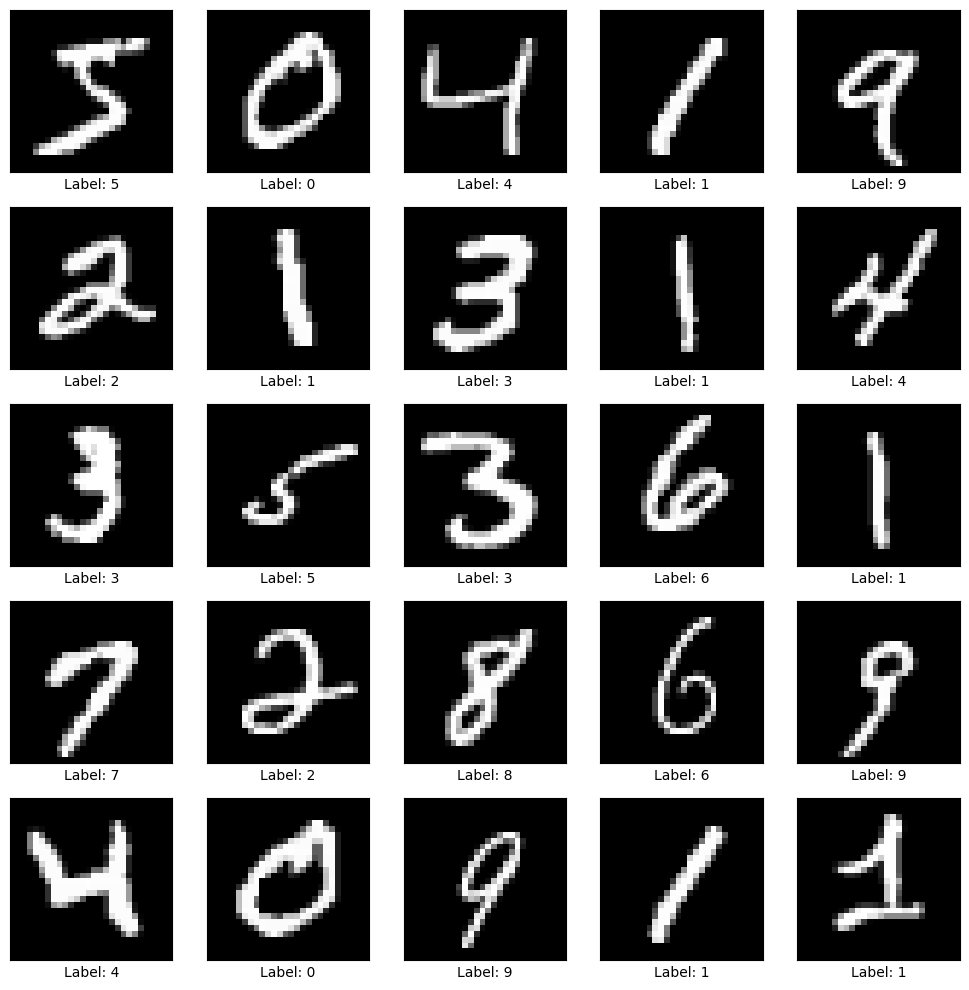

In [ ]:
# Tampilkan 25 gambar pertama dari dataset training
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_mnist[i].reshape(28, 28), cmap='gray')
    plt.xlabel(f'Label: {train_labels_mnist[i]}')
plt.tight_layout()
plt.show()

In [ ]:
# Membuat model CNN untuk MNIST
model_mnist = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.4),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_mnist.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 944,874 (3.60 MB)

 Trainable params: 943,978 (3.60 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Compile model dengan categorical crossentropy karena multi-class classification
model_mnist.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Training model
history_mnist = model_mnist.fit(
    train_images_mnist,
    train_labels_mnist,
    epochs=15,
    batch_size=128,
    validation_data=(test_images_mnist, test_labels_mnist),
    verbose=1
)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 401s 837ms/step - accuracy: 0.8662 - loss: 0.4415 - val_accuracy: 0.9663 - val_loss: 0.1077
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 385s 822ms/step - accuracy: 0.9793 - loss: 0.0696 - val_accuracy: 0.9897 - val_loss: 0.0287
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 381s 812ms/step - accuracy: 0.9849 - loss: 0.0485 - val_accuracy: 0.9913 - val_loss: 0.0252
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 382s 812ms/step - accuracy: 0.9864 - loss: 0.0445 - val_accuracy: 0.9932 - val_loss: 0.0227
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 386s 824ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9935 - val_loss: 0.0201
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 382s 815ms/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9935 - val_loss: 0.0203
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 391s 834ms/step - accuracy: 0.9906 - loss: 0.0283 - val_accuracy: 0.9901 - val_loss: 0.0284
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 434s 817ms/step - accuracy: 0.9914 -

In [ ]:
# Evaluasi model pada test set
test_loss_mnist, test_acc_mnist = model_mnist.evaluate(test_images_mnist, test_labels_mnist, verbose=2)

print(f'\nTest accuracy: {test_acc_mnist:.4f} ({test_acc_mnist*100:.2f}%)')
print(f'Test loss: {test_loss_mnist:.4f}')

313/313 - 16s - 50ms/step - accuracy: 0.9960 - loss: 0.0140

Test accuracy: 0.9960 (99.60%)
Test loss: 0.0140


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


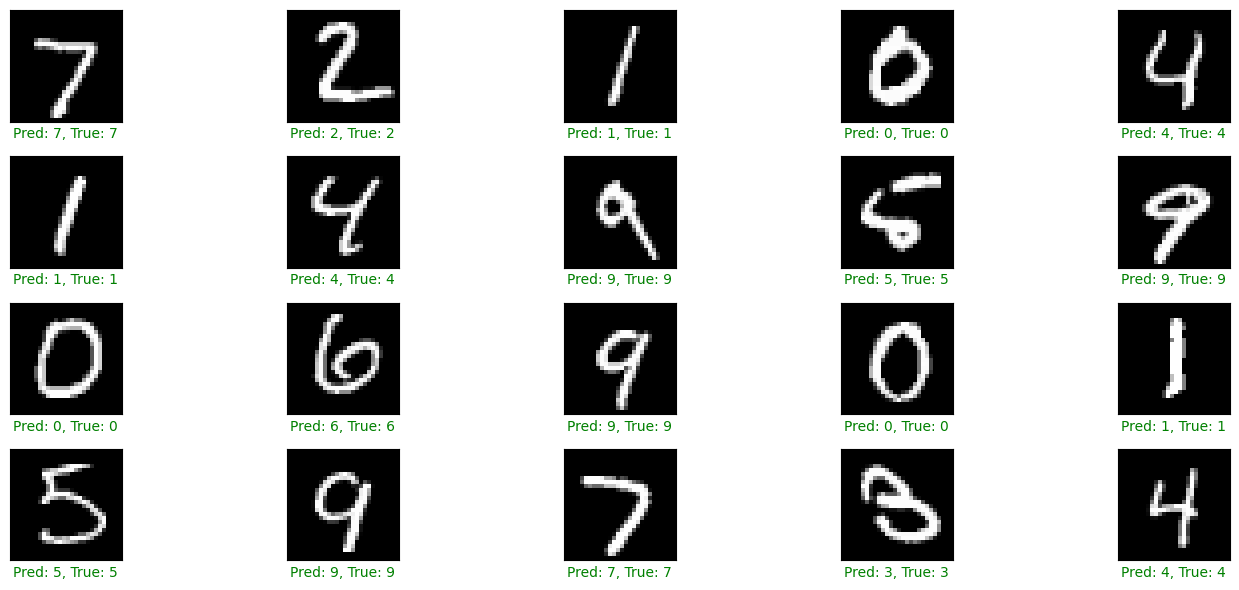

In [ ]:
# Prediksi pada beberapa sample test images
predictions = model_mnist.predict(test_images_mnist[:20])

# Menampilkan hasil prediksi
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_mnist[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels_mnist[i]

    # Warna hijau jika benar, merah jika salah
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f'Pred: {predicted_label}, True: {true_label}', color=color)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Prediksi semua test data
y_pred = model_mnist.predict(test_images_mnist)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print('\nClassification Report:')
print(classification_report(test_labels_mnist, y_pred_classes,
                          target_names=[str(i) for i in range(10)]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      1.00       892
           6       1.00      0.99      1.00       958
           7       1.00      1.00      1.00      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



Saya sudah berhasil membuat model CNN untuk klasifikasi MNIST dengan arsitektur:

1. 3 Blok Konvolusi dengan peningkatan filter (32 → 64 → 128)
2. Batch Normalization setelah setiap layer konvolusi untuk stabilitas training
3. Dropout (0.25, 0.25, 0.4, 0.5) untuk mencegah overfitting
4. MaxPooling (2x2) untuk downsampling
5. Fully Connected Layer dengan 128 neuron
6. Output Layer dengan 10 neuron (softmax) untuk 10 kelas digit (0-9)

Parameter Training:
- Optimizer: Adam
- Loss Function: Sparse Categorical Crossentropy
- Epochs: 15
- Batch Size: 128

Hasil:
- Akurasi testing = 99.60%
- Model mampu mengklasifikasikan digit tulisan tangan dengan sangat baik